#### March 25, 2021
#### Lori Segovia


![Image of Zillow Logo](https://theme.zdassets.com/theme_assets/512712/5675f10a90572d0f4140b0b39e72e4905bce34ee.jpg)

# <span style="color:black;"> Estimating Home Value </span>


## <span style="color:royalblue;"> Goals </span>
* Predict values of single unit properties that the tax distict assess using the property data from those whose last transaction was during May 2017 - August 2017
* Obtain States and Counties of properties
* Obtain tax rates for each country
* Provide distribution of tax rates for each county

## <span style="color:royalblue;"> Hypotheses </span>
1.  There is not a linear correlation between square footage of home and tax value.
2.  There is not a linear correlation between bedrooms and tax value.
3.  There is not a linear correlation between bathrooms and tax value.
4.  There is not a difference between tax value between Los Angeles and Orange County

## <span style="color:royalblue;"> Plan </span>
* acquire the data with sql
* clean/prep the data
* explore features of data
* model data
* evaluate data

## <span style="color:royalblue;"> Acquire </span>

- Zillow data was queried from Codeup mysql database
- env.py file with user info needed to access Zillow dataset from Codeup Database

### Imports needed for this notebook:

In [1]:
## python files that contain the functions to aquire and prep the data
import wrangle
import explore
import model
import pandas as pd
import numpy as np

# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
import math

# scikit learn
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

#visulization settings
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.style as style 
style.available
style.use('seaborn-talk') #sets the size of the charts
style.use('seaborn-colorblind') #sets color of charts

#warnings
import warnings
warnings.filterwarnings("ignore")

### Data Summary

In [2]:
df = wrangle.clean_zillow(wrangle.get_zillow_data())

In [3]:
df.head()

,bedrooms,bathrooms,yearbuilt,county,zip_code,fips,latitude,longitude,square_feet,taxamount,tax_value,property_age,tax_rate
parcelid,,,,,,,,,,,,,
14297519,4,3.5,1998,1286,96978,6059,33634931,-117869207,3100.0,11013.72,1023282.0,23,0.010763
17052889,2,1.0,1967,2061,97099,6111,34449266,-119281531,1465.0,5672.48,464000.0,54,0.012225
14186244,3,2.0,1962,1286,97078,6059,33886168,-117823170,1243.0,6488.30,564778.0,59,0.011488
12177905,4,3.0,1970,3101,96330,6037,34245180,-118240722,2376.0,1777.51,145143.0,51,0.012247
10887214,3,3.0,1964,3101,96451,6037,34185120,-118414640,1312.0,1533.89,119407.0,57,0.012846


In [4]:
df.describe()

,bedrooms,bathrooms,yearbuilt,county,zip_code,fips,latitude,longitude,square_feet,taxamount,tax_value,property_age,tax_rate
count,77253.00000,77253.000000,77253.000000,77253.000000,77253.000000,77253.000000,7.725300e+04,7.725300e+04,77253.000000,77253.000000,7.725300e+04,77253.000000,77253.000000
mean,3.06115,2.304254,1968.598799,2535.858905,96586.484033,6048.770261,3.400856e+07,-1.182035e+08,1784.127568,5977.930106,4.886524e+05,52.401201,0.013167
std,1.12984,0.990168,23.786244,801.100915,3800.227667,20.707202,2.652595e+05,3.588717e+05,953.267975,7576.150343,6.499134e+05,23.786244,0.005758
min,0.00000,0.000000,1824.000000,1286.000000,95982.000000,6037.000000,3.333953e+07,-1.194753e+08,128.000000,19.920000,1.000000e+03,5.000000,0.000094
25%,2.00000,2.000000,1953.000000,1286.000000,96193.000000,6037.000000,3.381480e+07,-1.184150e+08,1182.000000,2714.890000,2.070000e+05,34.000000,0.011662
50%,3.00000,2.000000,1970.000000,3101.000000,96389.000000,6037.000000,3.402210e+07,-1.181809e+08,1541.000000,4447.620000,3.587690e+05,51.000000,0.012286
75%,4.00000,3.000000,1987.000000,3101.000000,96987.000000,6059.000000,3.417436e+07,-1.179290e+08,2110.000000,6920.740000,5.685390e+05,68.000000,0.013455
max,16.00000,18.000000,2016.000000,3101.000000,399675.000000,6111.000000,3.481877e+07,-1.175546e+08,35640.000000,586639.300000,4.906124e+07,197.000000,0.816490


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77253 entries, 14297519 to 13083743
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      77253 non-null  int64  
 1   bathrooms     77253 non-null  float64
 2   yearbuilt     77253 non-null  int64  
 3   county        77253 non-null  int64  
 4   zip_code      77253 non-null  int64  
 5   fips          77253 non-null  int64  
 6   latitude      77253 non-null  int64  
 7   longitude     77253 non-null  int64  
 8   square_feet   77253 non-null  float64
 9   taxamount     77253 non-null  float64
 10  tax_value     77253 non-null  float64
 11  property_age  77253 non-null  int64  
 12  tax_rate      77253 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 8.3 MB


In [6]:
df.shape

(77253, 13)

##### *prep and clean summary after additional info*

## <span style="color:royalblue;"> Additional Info (outside of the model) </span>

- states and counties the properties are located in
- distribution of tax rates for each county 
- distribution of tax rates for each county so that we can see how much they vary within the properties in the county and the rates the bulk of the properties sit around

### States and Counties of Properties

#### The Federal Information Processing Standard Publication 6-4 (FIPS 6-4) was a five-digit Federal Information Processing Standards code which uniquely identified counties and county equivalents in the United States, certain U.S. possessions, and certain freely associated states.  These are the location of the following States and Counties obtained from looking up FIPS code:
* Los Angeles County, California (6037)
* Orange County, California (6059)
* Ventura County, California (6111)

In [7]:
df.fips.value_counts()

6037    50555
6059    20507
6111     6191
Name: fips, dtype: int64

In [8]:
df.fips.value_counts(normalize=True)

6037    0.654408
6059    0.265452
6111    0.080139
Name: fips, dtype: float64

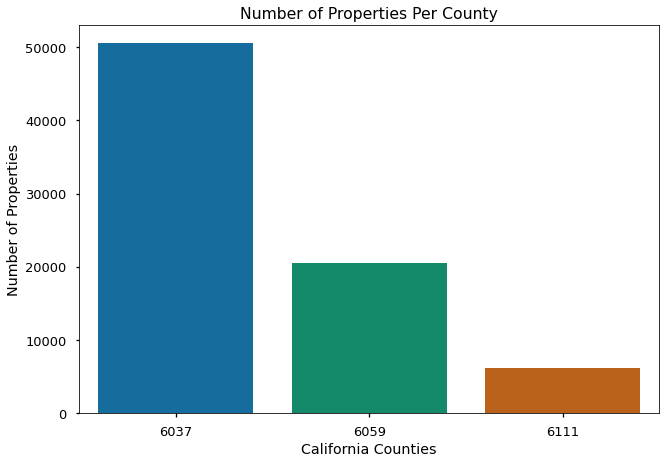

In [9]:
plt.title('Number of Properties Per County')
sns.countplot(df.fips)
plt.xlabel('California Counties')
plt.ylabel('Number of Properties')
plt.show()

In [10]:
#Change fips to county names now that we know where they come from
df.rename(columns={"fips": "ca_county"}, inplace=True)


In [11]:
df['ca_county'] = df['ca_county'].map({6037: 'Los Angeles', 6059: 'Orange', 6111: 'Ventura'})


In [12]:
df.ca_county.value_counts()

Los Angeles    50555
Orange         20507
Ventura         6191
Name: ca_county, dtype: int64

### Distribution of Tax Rate 
- The mean tax rate of Los Angeles County is 1.38 %
- The mean tax rate of Orange County is 1.21 %
- The mean tax rate of Ventura County is 1.20 %

In [13]:
tax_rates = df.groupby("ca_county").tax_rate.mean()
tax_rates 


ca_county
Los Angeles    0.013768
Orange         0.012064
Ventura        0.011912
Name: tax_rate, dtype: float64

##### Los Angeles County
- tax rate distribution can be viewed below

In [14]:
lac = df[df.ca_county == "Los Angeles"].tax_rate
lac_mean = round(lac.mean(),3)

(0.0, 0.1)

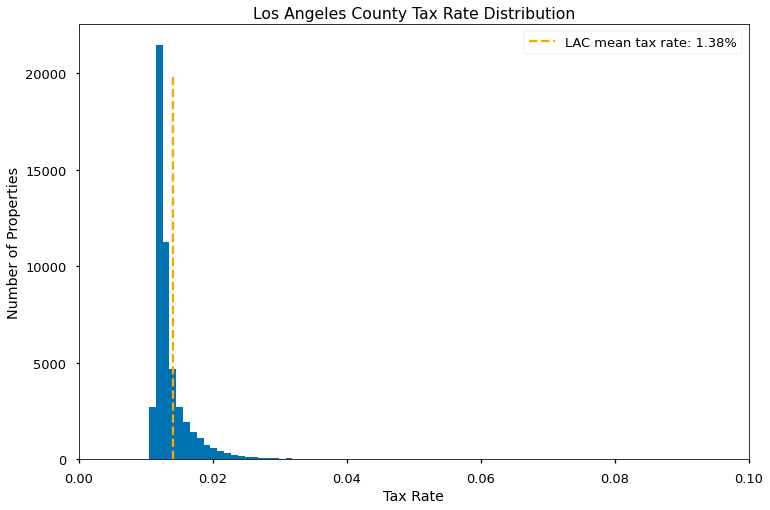

In [15]:
plt.figure(figsize=(12,8))
plt.title("Los Angeles County Tax Rate Distribution")
plt.hist(lac, bins=800)
plt.vlines(lac_mean, 0, 20000, ls='--', color='orange', label="LAC mean tax rate: 1.38%")
plt.xlabel('Tax Rate')
plt.ylabel("Number of Properties")
plt.legend()
plt.xlim(0.0, 0.1)

##### Orange County
- tax rate distribution can be viewed below

In [16]:
oc = df[df.ca_county == "Orange"].tax_rate
oc_mean = round(oc.mean(), 3)

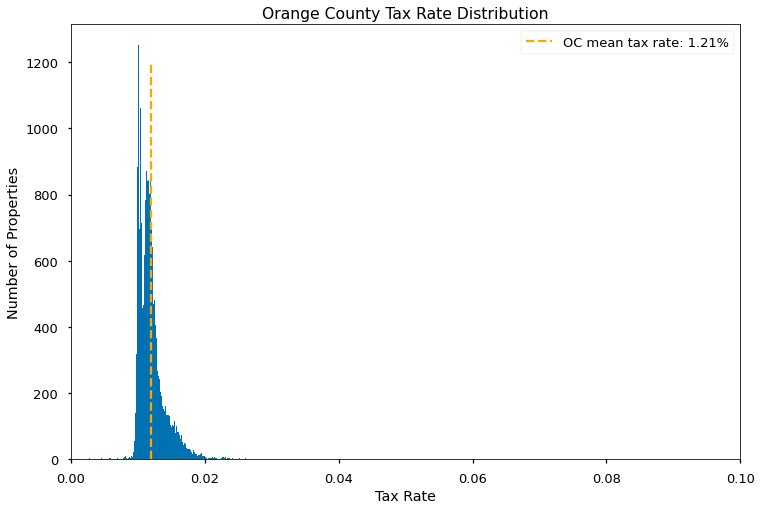

In [17]:
plt.figure(figsize=(12,8))
plt.title("Orange County Tax Rate Distribution")
plt.hist(oc, bins=800)
plt.vlines(oc_mean, 0, 1200, ls='--', color='orange', label="OC mean tax rate: 1.21%")
plt.xlabel('Tax Rate')
plt.xlim(0.0, 0.1)
plt.ylabel("Number of Properties")
plt.legend()

##### Ventura County
- tax rate distribution can be viewd below

In [18]:
vc = df[df.ca_county == "Ventura"].tax_rate
vc_mean = round(vc.mean(), 3)
vc_mean

0.012

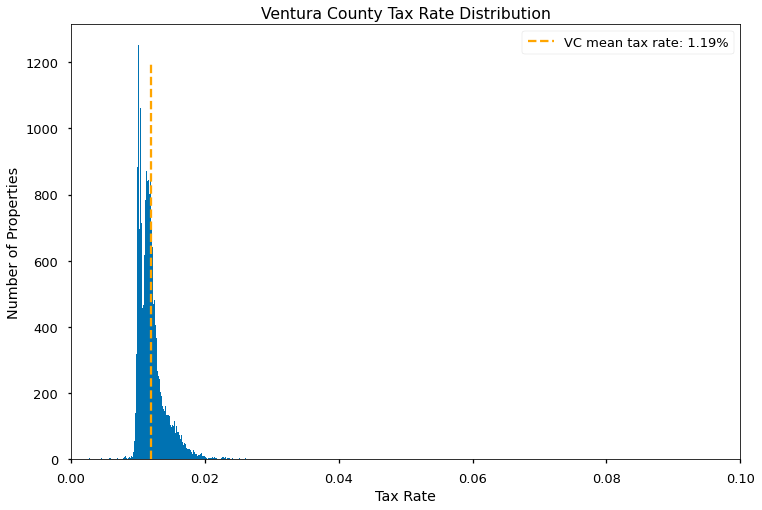

In [19]:
plt.figure(figsize=(12,8))
plt.title("Ventura County Tax Rate Distribution")
plt.hist(oc, bins=800)
plt.vlines(vc_mean, 0, 1200, ls='--', color='orange', label="VC mean tax rate: 1.19%")
plt.xlabel('Tax Rate')
plt.ylabel('Number of Properties')
plt.xlim(0.0, 0.1)
plt.legend()

# Phase I:  MVP

## <span style="color:royalblue;"> Prepare </span>

#### Dropping yearbuilt, county, zip_code, ca_county, latitude, longitude, taxamount, and property age.  Will reintroduce after first iteration (mvp).

In [20]:
mvp = df.copy()

In [21]:
mvp.drop(['yearbuilt', 'county', 'zip_code', 'ca_county', 'latitude','longitude', 'taxamount', 'property_age', 'tax_rate'], axis=1, inplace=True)


In [22]:
mvp.head()

,bedrooms,bathrooms,square_feet,tax_value
parcelid,,,,
14297519,4,3.5,3100.0,1023282.0
17052889,2,1.0,1465.0,464000.0
14186244,3,2.0,1243.0,564778.0
12177905,4,3.0,2376.0,145143.0
10887214,3,3.0,1312.0,119407.0


In [23]:
mvp.describe()

,bedrooms,bathrooms,square_feet,tax_value
count,77253.00000,77253.000000,77253.000000,7.725300e+04
mean,3.06115,2.304254,1784.127568,4.886524e+05
std,1.12984,0.990168,953.267975,6.499134e+05
min,0.00000,0.000000,128.000000,1.000000e+03
25%,2.00000,2.000000,1182.000000,2.070000e+05
50%,3.00000,2.000000,1541.000000,3.587690e+05
75%,4.00000,3.000000,2110.000000,5.685390e+05
max,16.00000,18.000000,35640.000000,4.906124e+07


In [24]:
mvp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77253 entries, 14297519 to 13083743
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     77253 non-null  int64  
 1   bathrooms    77253 non-null  float64
 2   square_feet  77253 non-null  float64
 3   tax_value    77253 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 5.4 MB


In [25]:
mvp.shape

(77253, 4)

In [26]:
#bedroom value counts
mvp.bedrooms.value_counts()

3     30406
2     19196
4     17524
5      4540
1      3381
6       996
0       625
8       250
7       206
9        69
10       31
12       16
11        9
13        2
16        1
14        1
Name: bedrooms, dtype: int64

In [27]:
#bathroom value counts
mvp.bathrooms.value_counts()

2.0     31546
3.0     17329
1.0     12924
2.5      6601
4.0      3344
1.5      1416
3.5      1030
5.0      1021
4.5       691
6.0       418
0.0       387
5.5       224
7.0       114
8.0       108
6.5        47
9.0        23
7.5        16
10.0        7
11.0        3
8.5         2
13.0        1
18.0        1
Name: bathrooms, dtype: int64

In [28]:
#square feet value counts
mvp.square_feet.value_counts()


1200.0    182
1120.0    169
1440.0    148
1080.0    133
1260.0    121
         ... 
6549.0      1
5774.0      1
7324.0      1
8932.0      1
6758.0      1
Name: square_feet, Length: 4967, dtype: int64

In [29]:
#tax value value counts
mvp.tax_value.value_counts()

400000.0    55
600000.0    50
350000.0    49
450000.0    45
455000.0    44
            ..
302900.0     1
80182.0      1
302897.0     1
144306.0     1
98304.0      1
Name: tax_value, Length: 50732, dtype: int64

#### Data Summary Takeaways:
- tax_value, square_feet, bathrooms, and bedrooms all have outliers
- mean of all columns is skewed by the max outliers (really big/expensive properties)

#### Clean and Prep Summary:
- renamed bedroomcnt: bedrooms, bathroomcnt: bathrooms, calculatedfinishedsquarefeet: square_feet, taxvaluedollarcnt: tax_value, regionidzip: zip_code, and regionidcounty: county
- changed all data types to int except parcelid, bathrooms, tax_value, square_feet, and fips
- two new columns made: property_age and tax_rate
- nulls dropped 

### Visualize Univariates

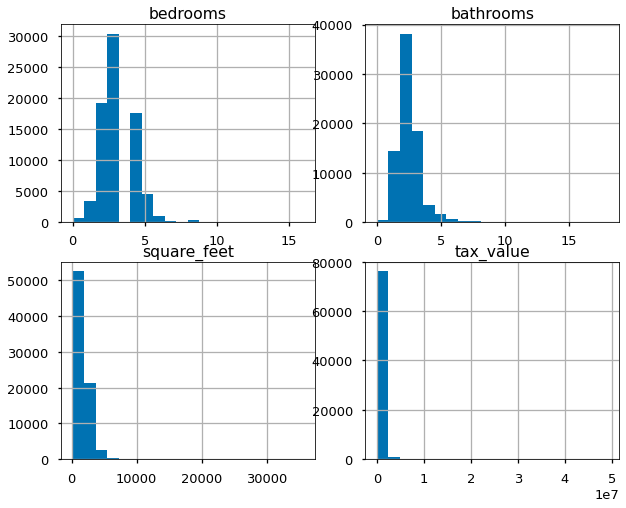

In [30]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(['bedrooms', 'bathrooms', 'square_feet', 'tax_value']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(2,2, plot_number)
    plt.title(col)
    series.hist(bins=20)

#### Univariate Plot Takeaways:
- Bedrooms distribution is the closest to being normally distributed
- Bathrooms distribution is skewed to the right
- The outliers in square_feet and tax_value make these distributions very skewed.  


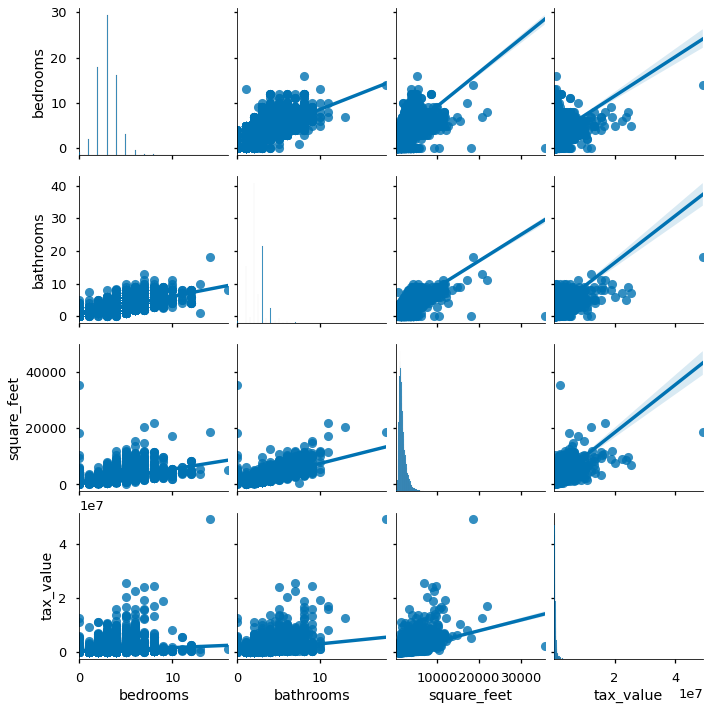

In [31]:
sns.pairplot(mvp,
            x_vars=["bedrooms", "bathrooms", "square_feet", 'tax_value'],
            y_vars=["bedrooms", "bathrooms", "square_feet", 'tax_value'],
            kind= "reg")

#### Pairplot Takeaways:
- Clusters in the lower ranges for all variables and many outliers
- Will address outliers in next iteration

## <span style="color:royalblue;"> Explore </span>

#### Split:
- Data is split into train, validate, and test dataframes

In [32]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test_split(mvp,'tax_value', 123)

In [33]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (43261, 4)
validate -> (18541, 4)
test -> (15451, 4)


In [34]:
train.head()

,bedrooms,bathrooms,square_feet,tax_value
parcelid,,,,
17228134,3,2.0,1888.0,246735.0
11357458,3,2.0,1484.0,149689.0
17153382,2,2.0,1937.0,540544.0
14682419,3,3.0,1526.0,630000.0
10914366,2,2.0,1114.0,460475.0


#### Scale:
- will scale all numeric features to normalize the numeric range

In [35]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.Standard_Scaler(X_train, X_validate, X_test)

In [36]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled

(StandardScaler(),
           bedrooms  bathrooms  square_feet
 parcelid                                  
 17228134 -0.057485  -0.308101     0.108099
 11357458 -0.057485  -0.308101    -0.317575
 17153382 -0.942493  -0.308101     0.159728
 14682419 -0.057485   0.701348    -0.273322
 10914366 -0.942493  -0.308101    -0.707425
 ...            ...        ...          ...
 11644337 -0.057485   1.710797     2.778042
 13926156 -0.057485  -0.308101     0.561167
 14306263 -0.057485  -0.308101    -0.260678
 14654702 -0.942493  -0.308101    -0.417671
 11119353  0.827522   0.701348     0.300916
 
 [43261 rows x 3 columns],
           bedrooms  bathrooms  square_feet
 parcelid                                  
 12698037 -0.057485  -0.308101    -0.258571
 14115188 -0.057485  -0.308101    -0.460871
 10783555  0.827522  -0.308101    -0.433476
 10846545  0.827522  -0.308101     0.306185
 14737034 -0.057485   0.701348    -0.233283
 ...            ...        ...          ...
 14691528 -0.942493  -0.3081

In [37]:
X_train_scaled.head()

,bedrooms,bathrooms,square_feet
parcelid,,,
17228134,-0.057485,-0.308101,0.108099
11357458,-0.057485,-0.308101,-0.317575
17153382,-0.942493,-0.308101,0.159728
14682419,-0.057485,0.701348,-0.273322
10914366,-0.942493,-0.308101,-0.707425


In [38]:
# categorical and quantitative variables
cat_vars = []
quant_vars = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value']

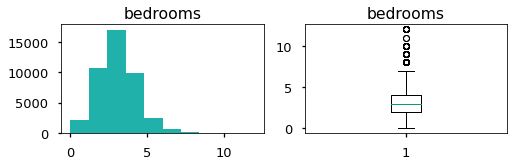

count    43261.000000
mean         3.064955
std          1.129947
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: bedrooms, dtype: float64


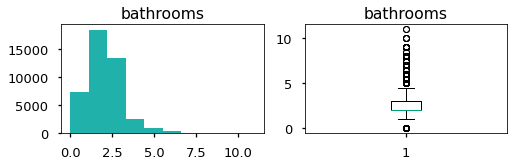

count    43261.000000
mean         2.305217
std          0.990651
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: bathrooms, dtype: float64


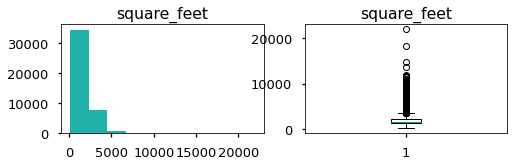

count    43261.000000
mean      1785.405146
std        949.094700
min        128.000000
25%       1186.000000
50%       1544.000000
75%       2111.000000
max      21929.000000
Name: square_feet, dtype: float64


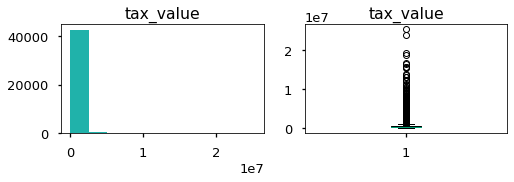

count    4.326100e+04
mean     4.897473e+05
std      6.424522e+05
min      1.000000e+03
25%      2.066680e+05
50%      3.573430e+05
75%      5.676540e+05
max      2.538125e+07
Name: tax_value, dtype: float64


In [39]:
explore.explore_univariate(train, cat_vars, quant_vars)


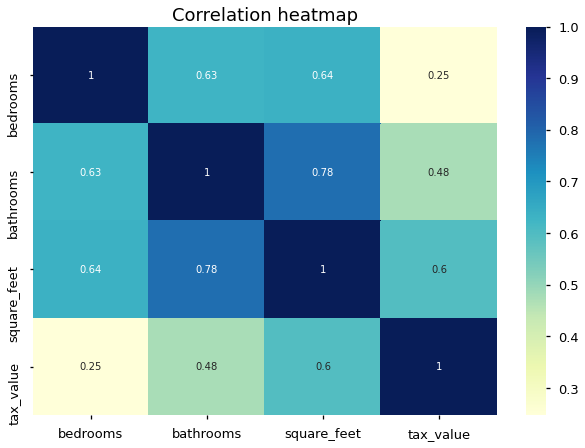

In [43]:
sns.heatmap(train.corr(), cmap='YlGnBu', annot=True)
plt.title('Correlation heatmap', fontsize = 18)
plt.show()

#### Correlation Heatmap Takeaways:
- the larger correlations seem to be between bathrooms and square feet and between bathrooms and bedrooms

### Statistical Tests
- Correlation tests

In [44]:
#set confidence interval and alpha before the test
conf_interval = .95 # desired confidence interval
alpha = 1 - conf_interval

#### Test 1 (corr):  
- **Null Hypothesis (HO)** = there is no linear correlation between the square footage of a home and tax value
- **Alternative Hypothesis (HA)** = there is a linear correlation between the square footage of a home and tax value


In [45]:
#calculate pearsons correlation coefficient
corr, p = stats.pearsonr(train.square_feet, train.tax_value)
corr, p

(0.596530827805485, 0.0)

In [46]:
#correlation test summary
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

Pvalue is: 0.0 is less than alpha: 0.050000000000000044
Reject the null hypothesis because there is a correlation present


#### Test 2 (corr):  
- **Null Hypothesis (HO)** = there is no linear correlation between the square footage of a home and bathroom count
- **Alternative Hypothesis (HA)** = there is a linear correlation between the square footage of a home and bathroom count


In [47]:
#calculate pearsons correlation coefficient
corr, p = stats.pearsonr(train.bathrooms, train.tax_value)
corr, p

(0.4763714031851606, 0.0)

In [49]:
#correlation test summary
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

Pvalue is: 0.0 is less than alpha: 0.050000000000000044
Reject the null hypothesis because there is a correlation present


#### Test 3 (corr):  
- **Null Hypothesis (HO)** = there is no linear correlation between the square footage of a home and bedroom count
- **Alternative Hypothesis (HA)** = there is a linear correlation between the square footage of a home and bedroom count

In [50]:
#calculate pearsons correlation coefficient
corr, p = stats.pearsonr(train.bedrooms, train.tax_value)
corr, p

(0.2472029478632281, 0.0)

In [51]:
#correlation test summary
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

Pvalue is: 0.0 is less than alpha: 0.050000000000000044
Reject the null hypothesis because there is a correlation present


## <span style="color:royalblue;"> Model </span>

In [52]:
X_train_scaled.head()

,bedrooms,bathrooms,square_feet
parcelid,,,
17228134,-0.057485,-0.308101,0.108099
11357458,-0.057485,-0.308101,-0.317575
17153382,-0.942493,-0.308101,0.159728
14682419,-0.057485,0.701348,-0.273322
10914366,-0.942493,-0.308101,-0.707425


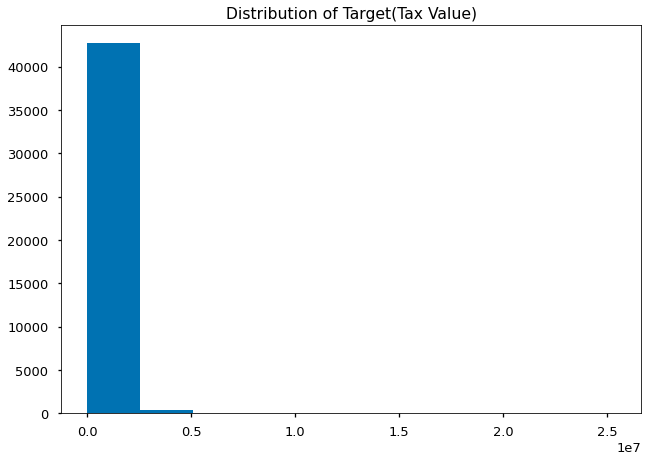

In [53]:
# how do we determine distribution?
plt.hist(y_train)
plt.title('Distribution of Target(Tax Value)')
plt.show()

In [54]:
y_train 

parcelid
17228134     246735.0
11357458     149689.0
17153382     540544.0
14682419     630000.0
10914366     460475.0
              ...    
11644337    2101164.0
13926156     258508.0
14306263     718578.0
14654702     153369.0
11119353     499747.0
Name: tax_value, Length: 43261, dtype: float64

In [55]:
X_train.shape, X_train_scaled.shape, y_train.shape, X_validate.shape, X_validate_scaled.shape, y_validate.shape, X_test.shape, X_test_scaled.shape, y_test.shape

((43261, 3),
 (43261, 3),
 (43261,),
 (18541, 3),
 (18541, 3),
 (18541,),
 (15451, 3),
 (15451, 3),
 (15451,))

In [56]:
#Create a Handy DataFrame for Evaluating Your Models or Model and Baseline Value.
#turn series into df
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [57]:
y_train.head()

,tax_value
parcelid,
17228134,246735.0
11357458,149689.0
17153382,540544.0
14682419,630000.0
10914366,460475.0


#### Baseline

In [58]:
# predict the median for ytrain and yvalidate
baseline_median = y_train['tax_value'].median()
y_train['baseline_median'] = baseline_median
y_validate['baseline_median'] = baseline_median
#predict the mean for ytrain and yvalidate
baseline_mean = y_train['tax_value'].mean()
y_train['baseline_mean'] = baseline_mean
y_validate['baseline_mean'] = baseline_mean

In [59]:
y_train.head()

,tax_value,baseline_median,baseline_mean
parcelid,,,
17228134,246735.0,357343.0,489747.322901
11357458,149689.0,357343.0,489747.322901
17153382,540544.0,357343.0,489747.322901
14682419,630000.0,357343.0,489747.322901
10914366,460475.0,357343.0,489747.322901


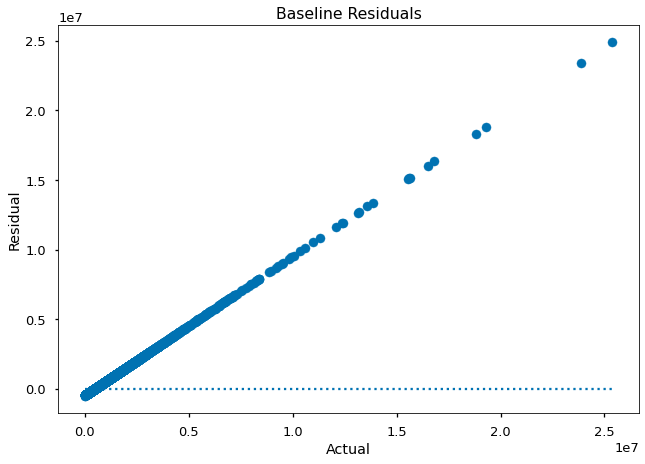

In [60]:
model.plot_residuals(y_train.tax_value, y_train.baseline_mean)

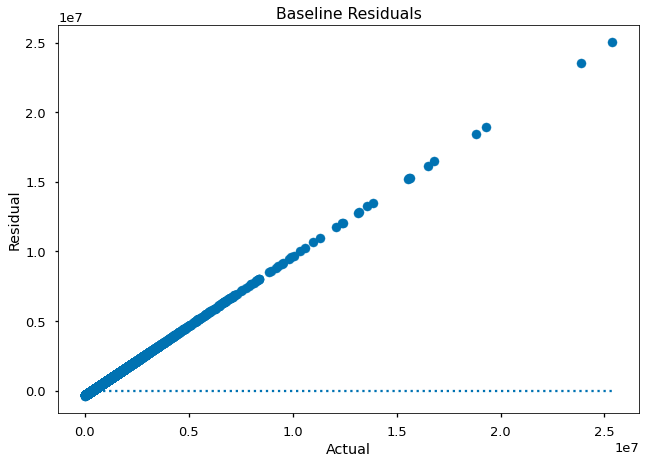

In [61]:
model.plot_residuals(y_train.tax_value, y_train.baseline_median)

In [62]:
#Evaluate the baseline model using the mean
model.baseline_mean_errors(y_train.tax_value)

{'sse': 1.78553405220765e+16,
 'mse': 412735270152.7126,
 'rmse': 642444.7603901152}

In [63]:
#Evaluate the baseline model using the median
model.baseline_median_errors(y_train.tax_value)

{'sse': 1.8613744991287336e+16,
 'mse': 430266174875.4614,
 'rmse': 655946.7774716646}

In [64]:
# RMSE of pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.baseline_mean) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.baseline_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# RMSE of pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.baseline_median) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.baseline_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  642444.76 
Validate/Out-of-Sample:  724108.89
RMSE using Median
Train/In-Sample:  655946.78 
Validate/Out-of-Sample:  736290.58


In [65]:
#going to use median

## Train and Validate

### Linear Regression OLS

In [66]:
#make the thing
lm = LinearRegression(normalize=True)

In [67]:
#fit the thing
#only fit on training
lm.fit(X_train, y_train.tax_value)

LinearRegression(normalize=True)

In [68]:
#use the thing
y_train['pred_lm'] = lm.predict(X_train)

In [69]:
y_train.head()

,tax_value,baseline_median,baseline_mean,pred_lm
parcelid,,,,
17228134,246735.0,357343.0,489747.322901,523997.243686
11357458,149689.0,357343.0,489747.322901,340647.531879
17153382,540544.0,357343.0,489747.322901,687743.416925
14682419,630000.0,357343.0,489747.322901,430159.839850
10914366,460475.0,357343.0,489747.322901,314236.454508


In [70]:
rmse_train_lm = mean_squared_error(y_train.tax_value, y_train.pred_lm)**(0.5)

In [71]:
# predict validate
y_validate['pred_lm'] = lm.predict(X_validate)

In [72]:
# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.tax_value, y_validate.pred_lm)**(0.5)

In [73]:
print(f'''
BASELINE:
              
RMSE using Median
Train/In-Sample: {round(rmse_train, 2)}
Validate/Out-of-Sample: {round(rmse_validate, 2)}
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: {round(rmse_train_lm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
''')


BASELINE:
              
RMSE using Median
Train/In-Sample: 655946.78
Validate/Out-of-Sample: 736290.58
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: 501695.26
Validation/Out-of-Sample: 593433.03



## LassoLars

In [74]:
#make the thing
lars = LassoLars(alpha=1.0)

In [75]:
#fit the thing
lars.fit(X_train, y_train.tax_value)

LassoLars()

In [76]:
#predict the thing: train
y_train['pred_lars'] = lars.predict(X_train)

In [77]:
# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.tax_value, y_train.pred_lars)**(0.5)

In [78]:
# predict the thing: validate
y_validate['pred_lars'] = lars.predict(X_validate)

In [79]:
# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.tax_value, y_validate.pred_lars)**(0.5)

In [80]:
print(f'''
BASELINE:
              
RMSE using Median
Train/In-Sample: {round(rmse_train, 2)}
Validate/Out-of-Sample: {round(rmse_validate, 2)}
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: {round(rmse_train_lm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
------------------------------------
RMSE for LassoLars:

Training/In-Sample: {round(rmse_train_lars, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
''')


BASELINE:
              
RMSE using Median
Train/In-Sample: 655946.78
Validate/Out-of-Sample: 736290.58
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: 501695.26
Validation/Out-of-Sample: 593433.03
------------------------------------
RMSE for LassoLars:

Training/In-Sample: 501695.54
Validation/Out-of-Sample: 593427.35



### TweedieRegressor

In [81]:
#make the thing
glm = TweedieRegressor(power=1, alpha=0)

In [82]:
#fit the thing 
glm.fit(X_train, y_train.tax_value)

TweedieRegressor(alpha=0, power=1)

In [83]:
#predict the thing: train
y_train['pred_glm'] = glm.predict(X_train)

In [84]:
# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.tax_value, y_train.pred_glm)**(0.5)

In [85]:
#predict the thing: validate
# predict validate
y_validate['pred_glm'] = glm.predict(X_validate)

In [86]:
# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.tax_value, y_validate.pred_glm)**(0.5)

In [87]:
print(f'''
BASELINE:
              
RMSE using Median
Train/In-Sample: {round(rmse_train, 2)}
Validate/Out-of-Sample: {round(rmse_validate, 2)}
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: {round(rmse_train_lm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
------------------------------------
RMSE for LassoLars:

Training/In-Sample: {round(rmse_train_lars, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0:

Training/In-Sample: {round(rmse_train_glm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
''')


BASELINE:
              
RMSE using Median
Train/In-Sample: 655946.78
Validate/Out-of-Sample: 736290.58
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: 501695.26
Validation/Out-of-Sample: 593433.03
------------------------------------
RMSE for LassoLars:

Training/In-Sample: 501695.54
Validation/Out-of-Sample: 593427.35
------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0:

Training/In-Sample: 642444.76
Validation/Out-of-Sample: 724108.89



### Polynomial Regression

In [88]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [89]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.tax_value, y_train.pred_lm2)**(0.5)

# predict validate
y_validate['pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.tax_value, y_validate.pred_lm2)**(0.5)

In [90]:
print(f'''
BASELINE:
              
RMSE using Median
Train/In-Sample: {round(rmse_train, 2)}
Validate/Out-of-Sample: {round(rmse_validate, 2)}
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: {round(rmse_train_lm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
------------------------------------
RMSE for LassoLars:

Training/In-Sample: {round(rmse_train_lars, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0:

Training/In-Sample: {round(rmse_train_glm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
------------------------------------
RMSE for Polynomial Model, degrees=2:

Training/In-Sample: {round(rmse_train_lm2, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm2, 2)}

''')


BASELINE:
              
RMSE using Median
Train/In-Sample: 655946.78
Validate/Out-of-Sample: 736290.58
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: 501695.26
Validation/Out-of-Sample: 593433.03
------------------------------------
RMSE for LassoLars:

Training/In-Sample: 501695.54
Validation/Out-of-Sample: 593427.35
------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0:

Training/In-Sample: 642444.76
Validation/Out-of-Sample: 724108.89
------------------------------------
RMSE for Polynomial Model, degrees=2:

Training/In-Sample: 478871.47
Validation/Out-of-Sample: 531701.34




### <span style="color:dodgerblue;"> Evaluate </span>

### Plotting Actual vs. Predicted Values

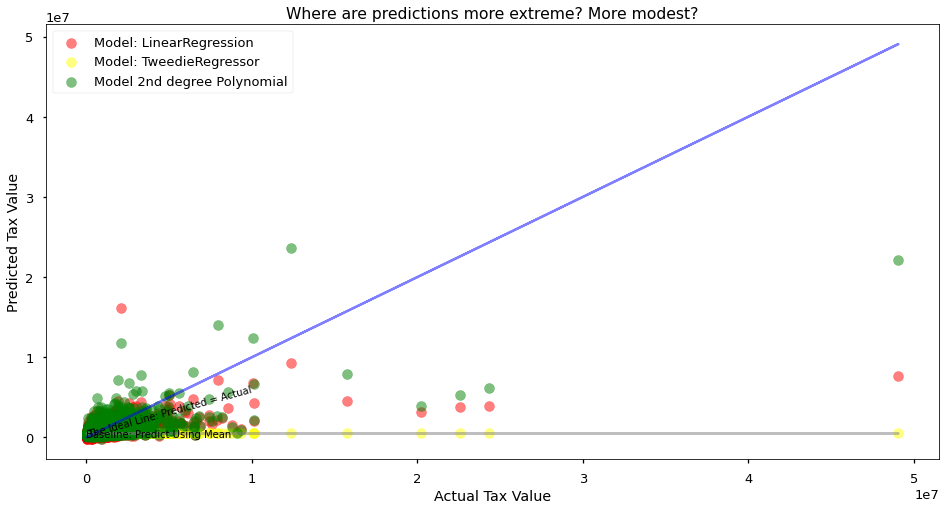

In [91]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.baseline_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

In [92]:

metric_df = pd.DataFrame(data=[{
    'model': 'median_baseline', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.baseline_median)}])


In [93]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate_lm,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lm)}, ignore_index=True)

In [94]:

metric_df = metric_df.append({
    'model': 'Lasso alpha 1', 
    'RMSE_validate': rmse_validate_lars,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lars)}, ignore_index=True)

In [95]:

metric_df = metric_df.append({
    'model': 'GLS (Poisson)', 
    'RMSE_validate': rmse_validate_glm,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_glm)}, ignore_index=True)

In [96]:
metric_df = metric_df.append({
    'model': 'Quadratic Model', 
    'RMSE_validate': rmse_validate_lm2,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lm2)}, ignore_index=True)

In [97]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,736290.584878,0.000000
1,OLS Regressor,593433.025501,0.328366
2,Lasso alpha 1,593427.350637,0.328379
3,GLS (Poisson),724108.894367,0.000000
4,Quadratic Model,531701.343262,0.460832


### Test

In [98]:

y_test = pd.DataFrame(y_test)

#predict on test
y_test['pred_lm2'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.pred_lm2)**(0.5)

print(f"""
RMSE for Polynomial Regressor, degrees=2:
    
Test/Out-of-Sample Performance: {rmse_test}
""")


RMSE for Polynomial Regressor, degrees=2:
    
Test/Out-of-Sample Performance: 433741.44914605323



# Phase II: Acquire More Data for Model

## Acquire
- same dataset from the beginning, but this time I will keep more variables

In [111]:
df = wrangle.clean_zillow(wrangle.get_zillow_data())

In [112]:
df.describe()

,bedrooms,bathrooms,yearbuilt,county,zip_code,fips,latitude,longitude,square_feet,taxamount,tax_value,property_age,tax_rate
count,77253.00000,77253.000000,77253.000000,77253.000000,77253.000000,77253.000000,7.725300e+04,7.725300e+04,77253.000000,77253.000000,7.725300e+04,77253.000000,77253.000000
mean,3.06115,2.304254,1968.598799,2535.858905,96586.484033,6048.770261,3.400856e+07,-1.182035e+08,1784.127568,5977.930106,4.886524e+05,52.401201,0.013167
std,1.12984,0.990168,23.786244,801.100915,3800.227667,20.707202,2.652595e+05,3.588717e+05,953.267975,7576.150343,6.499134e+05,23.786244,0.005758
min,0.00000,0.000000,1824.000000,1286.000000,95982.000000,6037.000000,3.333953e+07,-1.194753e+08,128.000000,19.920000,1.000000e+03,5.000000,0.000094
25%,2.00000,2.000000,1953.000000,1286.000000,96193.000000,6037.000000,3.381480e+07,-1.184150e+08,1182.000000,2714.890000,2.070000e+05,34.000000,0.011662
50%,3.00000,2.000000,1970.000000,3101.000000,96389.000000,6037.000000,3.402210e+07,-1.181809e+08,1541.000000,4447.620000,3.587690e+05,51.000000,0.012286
75%,4.00000,3.000000,1987.000000,3101.000000,96987.000000,6059.000000,3.417436e+07,-1.179290e+08,2110.000000,6920.740000,5.685390e+05,68.000000,0.013455
max,16.00000,18.000000,2016.000000,3101.000000,399675.000000,6111.000000,3.481877e+07,-1.175546e+08,35640.000000,586639.300000,4.906124e+07,197.000000,0.816490


In [114]:
df.head()

,bedrooms,bathrooms,yearbuilt,county,zip_code,fips,latitude,longitude,square_feet,taxamount,tax_value,property_age,tax_rate
parcelid,,,,,,,,,,,,,
14297519,4,3.5,1998,1286,96978,6059,33634931,-117869207,3100.0,11013.72,1023282.0,23,0.010763
17052889,2,1.0,1967,2061,97099,6111,34449266,-119281531,1465.0,5672.48,464000.0,54,0.012225
14186244,3,2.0,1962,1286,97078,6059,33886168,-117823170,1243.0,6488.30,564778.0,59,0.011488
12177905,4,3.0,1970,3101,96330,6037,34245180,-118240722,2376.0,1777.51,145143.0,51,0.012247
10887214,3,3.0,1964,3101,96451,6037,34185120,-118414640,1312.0,1533.89,119407.0,57,0.012846


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77253 entries, 14297519 to 13083743
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      77253 non-null  int64  
 1   bathrooms     77253 non-null  float64
 2   yearbuilt     77253 non-null  int64  
 3   county        77253 non-null  int64  
 4   zip_code      77253 non-null  int64  
 5   fips          77253 non-null  int64  
 6   latitude      77253 non-null  int64  
 7   longitude     77253 non-null  int64  
 8   square_feet   77253 non-null  float64
 9   taxamount     77253 non-null  float64
 10  tax_value     77253 non-null  float64
 11  property_age  77253 non-null  int64  
 12  tax_rate      77253 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 8.3 MB


In [116]:
df.isnull().sum()

bedrooms        0
bathrooms       0
yearbuilt       0
county          0
zip_code        0
fips            0
latitude        0
longitude       0
square_feet     0
taxamount       0
tax_value       0
property_age    0
tax_rate        0
dtype: int64

In [117]:
df.shape

(77253, 13)

## Prepare
- this data has already gone through:
    - handling null values (dropped all nulls, will try and impute some nulls later if time allows)
    - converting float variables that do not require a decimal to ints
    - changing columns names
    - drop columns
    - adding new columns
- this data set needs:
    - outliers to be handled
    - dummy columns for categorical variables
    - scaling
    - splitting
    - set parcelid to axis
    - drop columns we will not be using this iteration

In [118]:
#handle outliers
columns = ['bedrooms', 'bathrooms','square_feet', 'tax_value']
for x in columns:
    
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = (Q3 - Q1) * 1.5
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    df = df[df[x] < (upper)]
    
    print('column:', x,'\nIQR:', IQR, '\nUpper bound:', upper, '\nLower bound:', lower, '\n')

column: bedrooms 
IQR: 3.0 
Upper bound: 8.5 
Lower bound: -2.5 

column: bathrooms 
IQR: 1.5 
Upper bound: 5.25 
Lower bound: -0.25 

column: square_feet 
IQR: 1350.0 
Upper bound: 4102.0 
Lower bound: -848.0 

column: tax_value 
IQR: 514925.25 
Upper bound: 1318084.875 
Lower bound: -569974.375 



In [119]:
df.shape

(72633, 13)

##### Dataset dropped rows from 77253 to 72633 with removal of outliers

In [120]:
#features that will be dropped for this iteration
df.drop(['county', 'zip_code', 'latitude', 'longitude', 'taxamount'], axis=1, inplace=True)

In [121]:
#change fips to object so it doesnt get scaled later
df['fips'] = df['fips'].astype(object)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72633 entries, 14297519 to 13083743
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      72633 non-null  int64  
 1   bathrooms     72633 non-null  float64
 2   yearbuilt     72633 non-null  int64  
 3   fips          72633 non-null  object 
 4   square_feet   72633 non-null  float64
 5   tax_value     72633 non-null  float64
 6   property_age  72633 non-null  int64  
 7   tax_rate      72633 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 5.0+ MB


In [123]:
df.head()

,bedrooms,bathrooms,yearbuilt,fips,square_feet,tax_value,property_age,tax_rate
parcelid,,,,,,,,
14297519,4,3.5,1998,6059,3100.0,1023282.0,23,0.010763
17052889,2,1.0,1967,6111,1465.0,464000.0,54,0.012225
14186244,3,2.0,1962,6059,1243.0,564778.0,59,0.011488
12177905,4,3.0,1970,6037,2376.0,145143.0,51,0.012247
10887214,3,3.0,1964,6037,1312.0,119407.0,57,0.012846


## Explore

#### Split

In [126]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test_split(df,'tax_value', 123)

In [127]:
train.head()

,bedrooms,bathrooms,yearbuilt,fips,square_feet,tax_value,property_age,tax_rate
parcelid,,,,,,,,
12815320,5,4.0,1983,6037,3490.0,581233.0,38,0.011875
11490249,2,3.0,1980,6037,1387.0,575755.0,41,0.011870
11695472,1,1.0,1921,6037,900.0,137258.0,100,0.012332
12960692,3,3.0,1983,6037,1469.0,437512.0,38,0.013344
13057060,4,3.0,2003,6037,2481.0,646000.0,18,0.014325


In [128]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (40674, 8)
validate -> (17432, 8)
test -> (14527, 8)


#### Scale

In [129]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.Standard_Scaler(X_train, X_validate, X_test)

### Univariate Plots for New Features

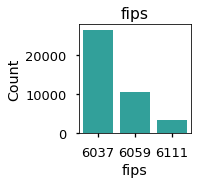

      fips  Count  Percent
6037  6037  26574    65.33
6059  6059  10700    26.31
6111  6111   3400     8.36
_________________________________________________________________


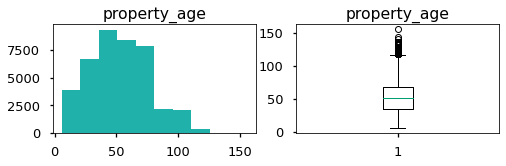

count    40674.000000
mean        52.788022
std         23.358785
min          6.000000
25%         35.000000
50%         52.000000
75%         68.000000
max        155.000000
Name: property_age, dtype: float64


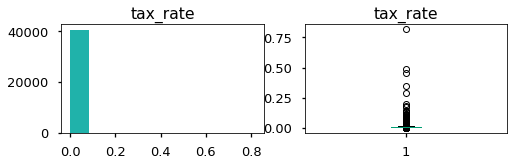

count    40674.000000
mean         0.013261
std          0.006903
min          0.000094
25%          0.011721
50%          0.012332
75%          0.013549
max          0.816490
Name: tax_rate, dtype: float64


In [130]:
cat_vars = ['fips']
quant_vars = ['property_age', 'tax_rate']
explore.explore_univariate(train, cat_vars, quant_vars)

#### Univariate takeways:
- los angeles properties dominated the dataset with ~65% of the properties coming from this county
- Mean property age is ~ 53 years

### Multivariate Plots to Focus on

Text(0.5, 1.0, 'Distribution of Tax Rates')

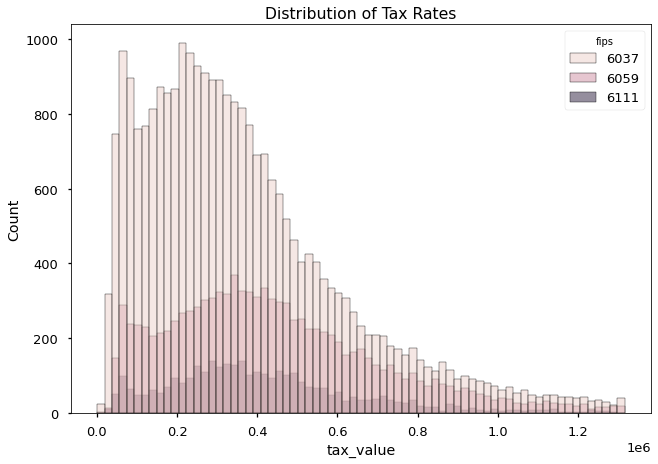

In [131]:
sns.histplot(data=train, x="tax_value", hue = 'fips')
plt.title('Distribution of Tax Rates')

#### LA has the highest tax value followed by OC, then VC

Text(0.5, 1.0, 'Distribution of Tax Rates across Property Age')

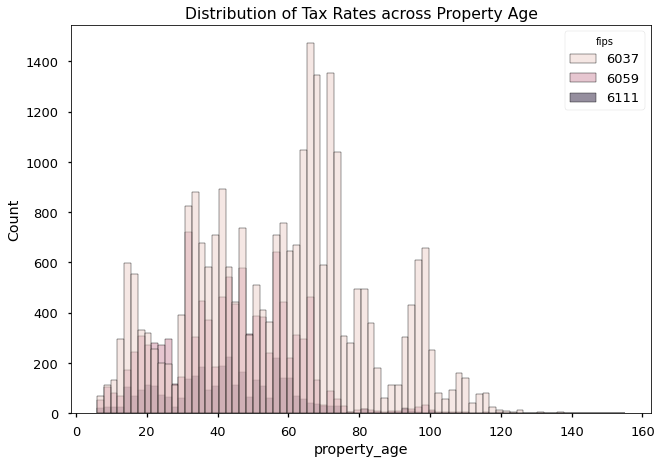

In [132]:
sns.histplot(data=train, x="property_age", hue = 'fips')
plt.title('Distribution of Tax Rates across Property Age')

#### Majority of homes older than 60 years seem to be concentrated in LA.

### Correlation Heatmap

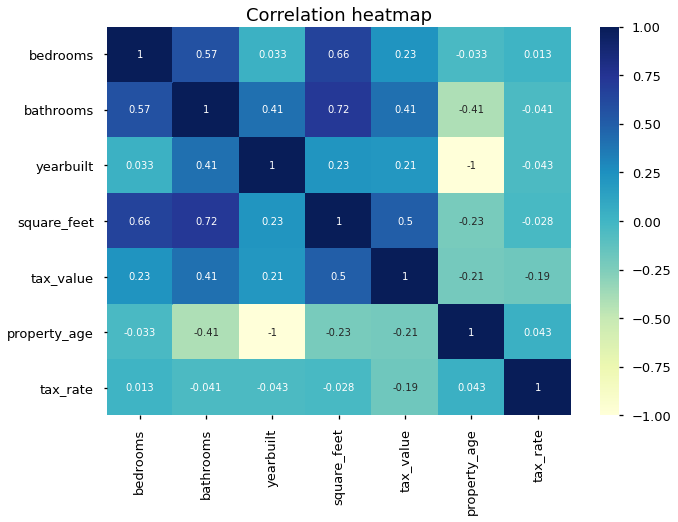

In [133]:
sns.heatmap(train.corr(), cmap='YlGnBu', annot=True)
plt.title('Correlation heatmap', fontsize = 18)
plt.show()

#### Heatmap Takeaways:
- square feet has the biggest correlations with bedrooms and bathrooms
- small correlation between tax_value and year built

### Statistical Test (ttest)

In [134]:
#set confidence interval and alpha before the test
conf_interval = .95 # desired confidence interval
alpha = 1 - conf_interval

#### Test 1 (corr):¶
- **Null Hypothesis (HO)** = there is no difference between the mean tax values of los angeles and orange county
- **Alternative Hypothesis (HA)** = there is a difference between the mean tax values of los angeles and orange county


In [135]:
la = train[train.fips == 6037]
oc = train[train.fips == 6059]

In [136]:
t, p = stats.ttest_ind(la.tax_value, oc.tax_value)
t, p

(-26.367054921172247, 8.119013227131884e-152)

In [137]:
#correlation test summary
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

Pvalue is: 8.119013227131884e-152 is less than alpha: 0.050000000000000044
Reject the null hypothesis because there is a correlation present


#### There is a difference between the mean tax values of LA and OC

### Feature Engineering

In [139]:
def select_kbest(x, y, k):
    
    # parameters: f_regression stats test, give me  features
    f_selector = SelectKBest(f_regression, k=k)
    
    # find the top  X's correlated with y
    f_selector.fit(X_train_scaled, y_train)
    
    # boolean mask of whether the column was selected or not. 
    feature_mask = f_selector.get_support()
    
    f_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()
    
    return f_feature

In [141]:
select_kbest(X_train_scaled,'tax_value', 5 )

['bedrooms', 'bathrooms', 'yearbuilt', 'square_feet', 'property_age']

In [143]:
select_kbest(X_train_scaled,'tax_value', 4 )

['bedrooms', 'bathrooms', 'square_feet', 'property_age']

In [144]:
select_kbest(X_train_scaled,'tax_value', 3 )

['bedrooms', 'bathrooms', 'square_feet']

#### Feature Engineering Takeaways:
- top 3 features are bedrooms, bathrooms, and square feet which we explored earlier
- next features to explore are yearbuilt and property age

## Modeling

In [145]:
X_train_scaled.head()

,bedrooms,bathrooms,yearbuilt,fips,square_feet,property_age,tax_rate
parcelid,,,,,,,
12815320,1.940945,2.247747,0.633090,-0.569695,2.709664,-0.633090,-0.200767
11490249,-0.944719,1.007104,0.504657,-0.569695,-0.387675,-0.504657,-0.201466
11695472,-1.906607,-1.474183,-2.021191,-0.569695,-1.104937,2.021191,-0.134502
12960692,0.017169,1.007104,0.633090,-0.569695,-0.266903,-0.633090,0.012039
13057060,0.979057,1.007104,1.489309,-0.569695,1.223589,-1.489309,0.154154


In [146]:
#Create a Handy DataFrame for Evaluating Your Models or Model and Baseline Value.
#turn series into df
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_train.head()

,tax_value
parcelid,
12815320,581233.0
11490249,575755.0
11695472,137258.0
12960692,437512.0
13057060,646000.0


### Baseline


In [147]:
# predict the median for ytrain and yvalidate
baseline_median = y_train['tax_value'].median()
y_train['baseline_median'] = baseline_median
y_validate['baseline_median'] = baseline_median
#predict the mean for ytrain and yvalidate
baseline_mean = y_train['tax_value'].mean()
y_train['baseline_mean'] = baseline_mean
y_validate['baseline_mean'] = baseline_mean

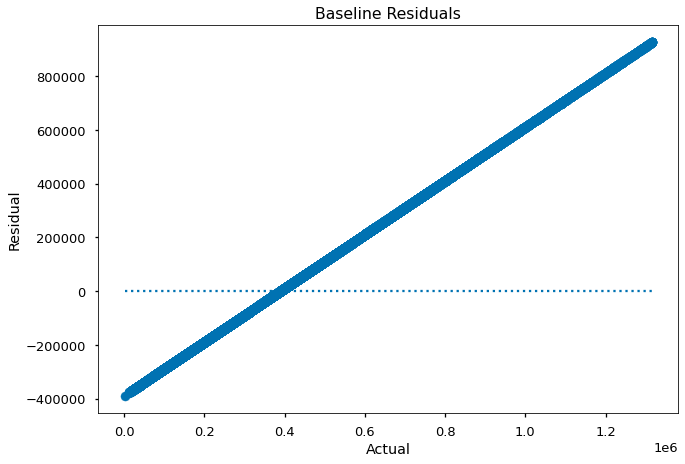

In [150]:

model.plot_residuals(y_train.tax_value, y_train.baseline_mean)

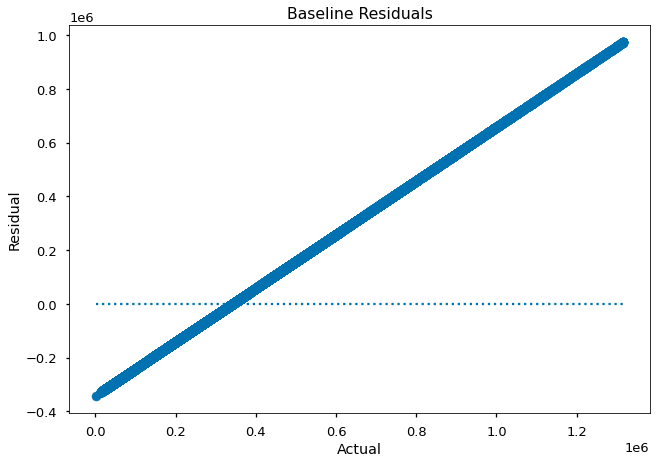

In [151]:
model.plot_residuals(y_train.tax_value, y_train.baseline_median)

In [152]:
#Evaluate the baseline model using the mean
model.baseline_mean_errors(y_train.tax_value)



{'sse': 2669874206269131.0,
 'mse': 65640807549.51888,
 'rmse': 256204.62046871614}

In [154]:
#Evaluate the baseline model using the median
model.baseline_median_errors(y_train.tax_value)

{'sse': 2762248820911300.5,
 'mse': 67911904924.79964,
 'rmse': 260599.1268688359}

In [155]:
# RMSE of pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.baseline_mean) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.baseline_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  256204.62 
Validate/Out-of-Sample:  256297.67


In [156]:
#RMSE of pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.baseline_median) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.baseline_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  260599.13 
Validate/Out-of-Sample:  260371.98


In [157]:
#going to use mean


## Train and Validate

### Linear Regression OLS

In [158]:
#make the thing
lm = LinearRegression(normalize=True)
#fit the thing
#only fit on training
lm.fit(X_train, y_train.tax_value)
#use the thing
y_train['pred_lm'] = lm.predict(X_train)
y_train.head()

rmse_train_lm = mean_squared_error(y_train.tax_value, y_train.pred_lm)**(0.5)
# predict validate
y_validate['pred_lm'] = lm.predict(X_validate)
# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.tax_value, y_validate.pred_lm)**(0.5)

### Lasso Lars

In [159]:
#make the thing
lars = LassoLars(alpha=1.0)
#fit the thing
lars.fit(X_train, y_train.tax_value)
#predict the thing: train
y_train['pred_lars'] = lars.predict(X_train)
# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.tax_value, y_train.pred_lars)**(0.5)
# predict the thing: validate
y_validate['pred_lars'] = lars.predict(X_validate)
# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.tax_value, y_validate.pred_lars)**(0.5)

### Tweedie Regressor

In [160]:
#make the thing
glm = TweedieRegressor(power=1, alpha=0)
#fit the thing 
glm.fit(X_train, y_train.tax_value)
#predict the thing: train
y_train['pred_glm'] = glm.predict(X_train)
# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.tax_value, y_train.pred_glm)**(0.5)
#predict the thing: validate
# predict validate
y_validate['pred_glm'] = glm.predict(X_validate)
# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.tax_value, y_validate.pred_glm)**(0.5)

### Polynomial Regression

In [161]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.tax_value, y_train.pred_lm2)**(0.5)

# predict validate
y_validate['pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.tax_value, y_validate.pred_lm2)**(0.5)

In [162]:
print(f'''
BASELINE:
              
RMSE using Median
Train/In-Sample: {round(rmse_train, 2)}
Validate/Out-of-Sample: {round(rmse_validate, 2)}
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: {round(rmse_train_lm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
------------------------------------
RMSE for LassoLars:

Training/In-Sample: {round(rmse_train_lars, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0:

Training/In-Sample: {round(rmse_train_glm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
------------------------------------
RMSE for Polynomial Model, degrees=2:

Training/In-Sample: {round(rmse_train_lm2, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm2, 2)}

''')


BASELINE:
              
RMSE using Median
Train/In-Sample: 260599.13
Validate/Out-of-Sample: 260371.98
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: 213571.14
Validation/Out-of-Sample: 213572.26
------------------------------------
RMSE for LassoLars:

Training/In-Sample: 213567.0
Validation/Out-of-Sample: 213555.93
------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0:

Training/In-Sample: 256204.62
Validation/Out-of-Sample: 256297.67
------------------------------------
RMSE for Polynomial Model, degrees=2:

Training/In-Sample: 202052.21
Validation/Out-of-Sample: 203443.78




## Evaluate

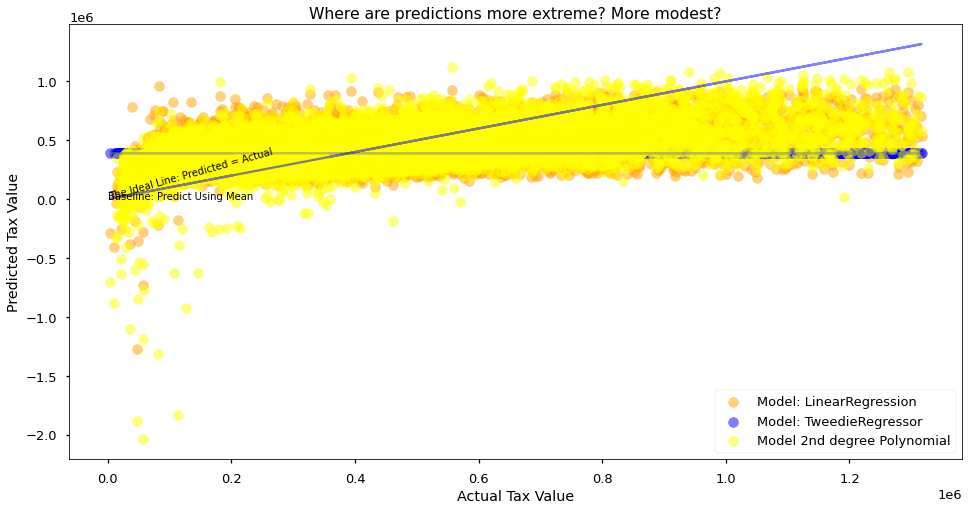

In [173]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.baseline_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.pred_lm, 
            alpha=.5, color="orange", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.pred_glm, 
            alpha=.5, color="blue", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.pred_lm2, 
            alpha=.5, color="yellow", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

In [164]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.baseline_mean)}])


In [165]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate_lm,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lm)}, ignore_index=True)


In [166]:
metric_df = metric_df.append({
    'model': 'Lasso alpha 1', 
    'RMSE_validate': rmse_validate_lars,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lars)}, ignore_index=True)

In [167]:
metric_df = metric_df.append({
    'model': 'GLS (Poisson)', 
    'RMSE_validate': rmse_validate_glm,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_glm)}, ignore_index=True)

In [168]:
metric_df = metric_df.append({
    'model': 'Quadratic Model', 
    'RMSE_validate': rmse_validate_lm2,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lm2)}, ignore_index=True)


In [169]:
metric_df   

,model,RMSE_validate,r^2_validate
0,mean_baseline,260371.981338,0.000000
1,OLS Regressor,213572.259255,0.305824
2,Lasso alpha 1,213555.925117,0.305692
3,GLS (Poisson),256297.668893,0.000000
4,Quadratic Model,203443.784923,0.369886


## TEST OUR BEST
- the best model was the polynomial model again with r^2 of 0.37, so we will test on this model

In [170]:
y_test = pd.DataFrame(y_test)

#predict on test
y_test['pred_lm2'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.pred_lm2)**(0.5)

print(f"""
RMSE for Polynomial Regressor, degrees=2:
    
Test/Out-of-Sample Performance: {rmse_test}
""")


RMSE for Polynomial Regressor, degrees=2:
    
Test/Out-of-Sample Performance: 200755.24385146907

